# Fase 1: Análisis Exploratorio de Datos (EDA) - IA E-Commerce
Este notebook se centra en la carga, limpieza y análisis inicial del dataset de e-commerce. El objetivo es preparar los datos para entrenar un modelo de aprendizaje supervisado que prediga el beneficio (Profit).

## 1. Configuración del Entorno
Importamos las librerías necesarias, asegurándonos de que coincidan con las dependencias del proyecto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética para las gráficas
sns.set_theme(style="whitegrid")
%matplotlib inline

## 2. Carga y Exploración Inicial
Cargamos los datos desde la ruta relativa estructurada en el repositorio

In [2]:
# Carga del dataset
try:
    df = pd.read_csv("../data/ecommerce.csv")
    print("Dataset cargado correctamente.")
except FileNotFoundError:
    print("Error: No se encontró el archivo en ../data/ecommerce.csv")

# Visualización de las primeras filas
df.head()

Dataset cargado correctamente.


,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


#### Inspección de Tipos y Calidad de Datos
Es crucial verificar que los tipos de datos sean correctos para el análisis.

In [3]:
# Verificación de tipos y nulos
df.info()

# Corrección técnica: Convertir 'Order Date' a datetime para análisis temporal
# (Nota: Esta mejora no estaba en el original y es esencial para IA)
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Verificación de duplicados y nulos
print(f"Valores nulos:\n{df.isnull().sum()}")
print(f"\nTotal de filas duplicadas: {df.duplicated().sum()}")

<class 'pandas.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   str    
 1   Product Name  3500 non-null   str    
 2   Category      3500 non-null   str    
 3   Region        3500 non-null   str    
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), str(4)
memory usage: 191.5 KB
Valores nulos:
Order Date      0
Product Name    0
Category        0
Region          0
Quantity        0
Sales           0
Profit          0
dtype: int64

Total de filas duplicadas: 0


In [4]:
df.describe()

,Order Date,Quantity,Sales,Profit
count,3500,3500.000000,3500.000000,3500.000000
mean,2023-07-13 00:53:53.828571,4.931714,3047.966000,527.047203
min,2022-01-01 00:00:00,1.000000,51.000000,6.970000
25%,2022-10-16 18:00:00,3.000000,1049.500000,158.695000
50%,2023-07-21 12:00:00,5.000000,2350.500000,361.070000
75%,2024-04-16 06:00:00,7.000000,4537.000000,729.125000
max,2024-12-31 00:00:00,9.000000,10782.000000,2946.930000
std,NaN,2.575895,2440.213237,504.139732


In [5]:
df.isnull().sum().sort_values(ascending=False)
df.duplicated().sum()

np.int64(0)

## 3. Análisis Estadístico y de la Variable Objetivo
Analizamos el comportamiento de Profit, nuestra variable objetivo en este modelo de aprendizaje supervisado

,Order Date,Quantity,Sales,Profit
count,3500,3500.000000,3500.000000,3500.000000
mean,2023-07-13 00:53:53.828571,4.931714,3047.966000,527.047203
min,2022-01-01 00:00:00,1.000000,51.000000,6.970000
25%,2022-10-16 18:00:00,3.000000,1049.500000,158.695000
50%,2023-07-21 12:00:00,5.000000,2350.500000,361.070000
75%,2024-04-16 06:00:00,7.000000,4537.000000,729.125000
max,2024-12-31 00:00:00,9.000000,10782.000000,2946.930000
std,NaN,2.575895,2440.213237,504.139732


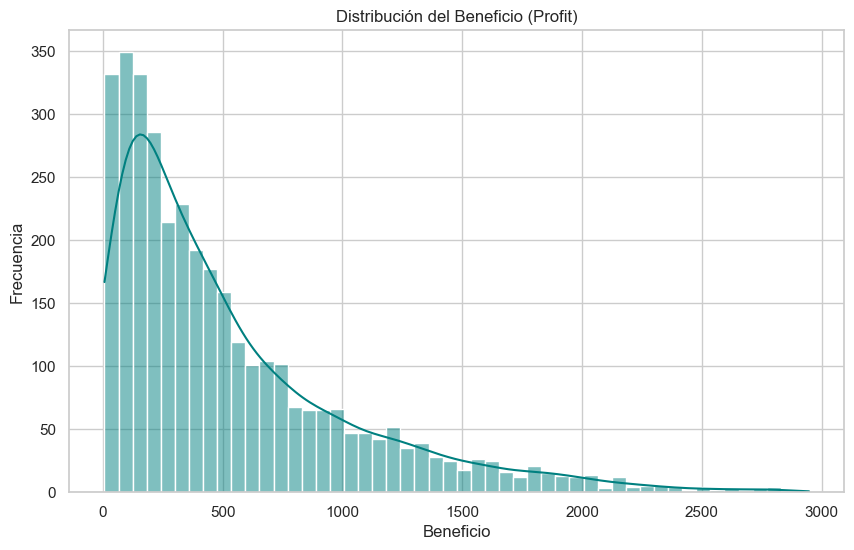

In [6]:
# Estadísticos descriptivos
display(df.describe())

# Análisis de la distribución de beneficios
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=50, kde=True, color='teal')
plt.title("Distribución del Beneficio (Profit)")
plt.xlabel("Beneficio")
plt.ylabel("Frecuencia")
plt.show()

**Interpretación**: La mayoría de las ventas se concentran en beneficios bajos, con una cola larga hacia la derecha (valores atípicos positivos). No se detectan beneficios negativos en este set de datos.

## 4. Análisis de Correlaciones y Categorías
Exploramos cómo influyen las ventas y las categorías en el beneficio final.

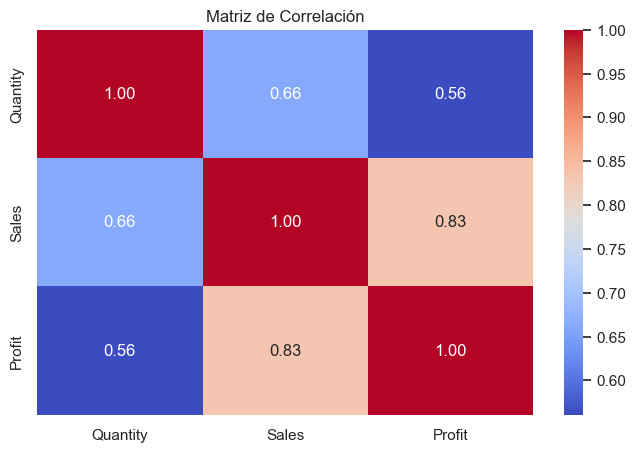

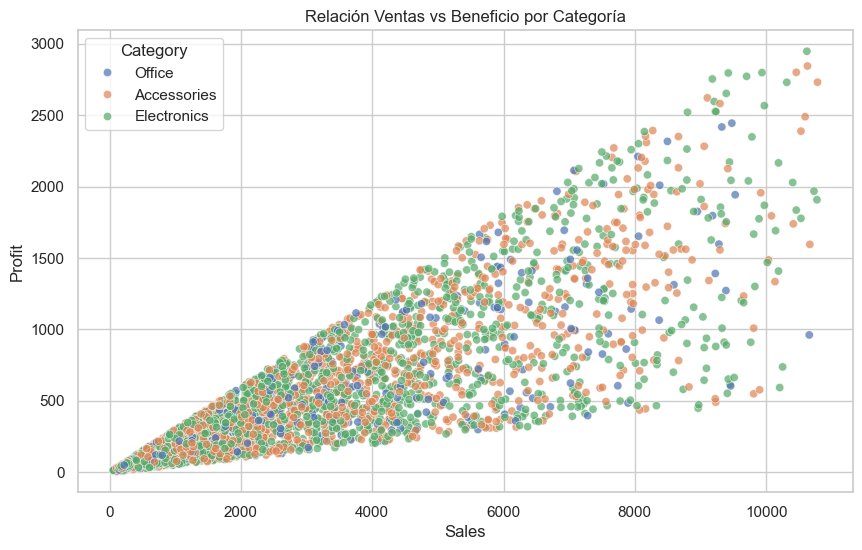

In [7]:
# Correlación numérica (Heatmap)
plt.figure(figsize=(8, 5))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Relación Ventas vs Beneficio por Categoría
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', alpha=0.7)
plt.title("Relación Ventas vs Beneficio por Categoría")
plt.show()